# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [33]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

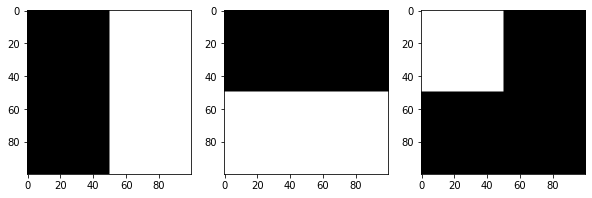

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


In [2]:
square1 = np.zeros((100, 100))
square2 = np.zeros((100, 100))
square3 = np.zeros((100, 100))

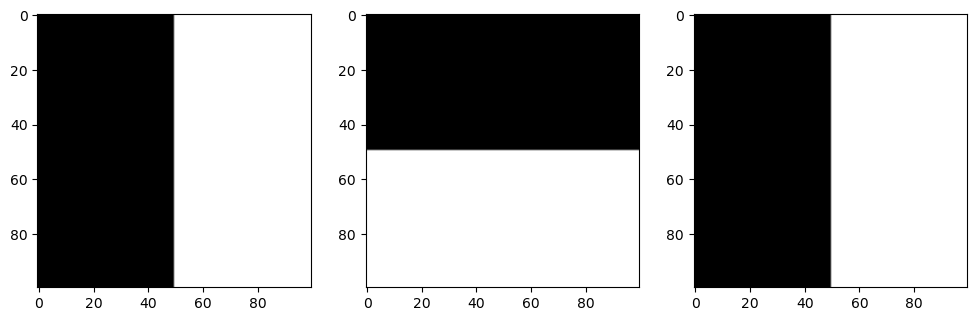

In [6]:
square1[:, 50:] = 1
square2[50:, :] = 1
square3[:, 50:] = 1

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display images
axes[0].imshow(square1, cmap='gray')
axes[1].imshow(square2, cmap='gray')
axes[2].imshow(square3, cmap='gray')

plt.show()
plt.show()

*   Use the above three images to create the following image

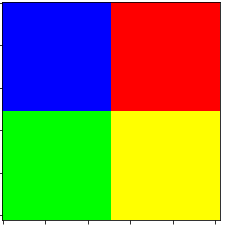
*Hint: Remember channels and color spaces*

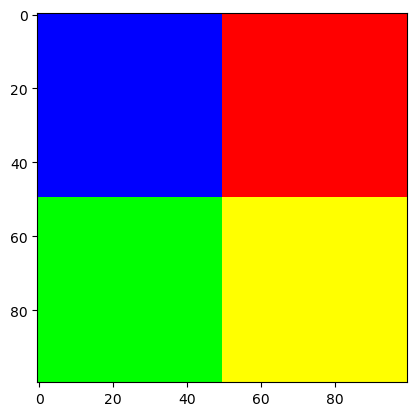

In [18]:
image_2 = np.zeros((100,100,3))


image_2[:50,:50] = [0, 0, 1] # for Blue RGB
image_2[50:,:50] = [0, 1, 0] # for green RGB
image_2[:50,50:] = [1, 0, 0] # for red RGB
image_2[50:,50:] = [1, 1, 0] # for yellow RGB

plt.imshow(image_2)
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

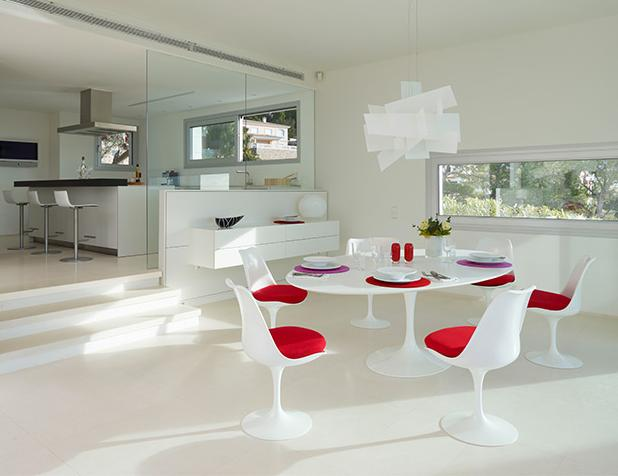

*   Extract individual channels and plot them using matplotlib subplot.



In [15]:
from PIL import Image

(-0.5, 617.5, 475.5, -0.5)

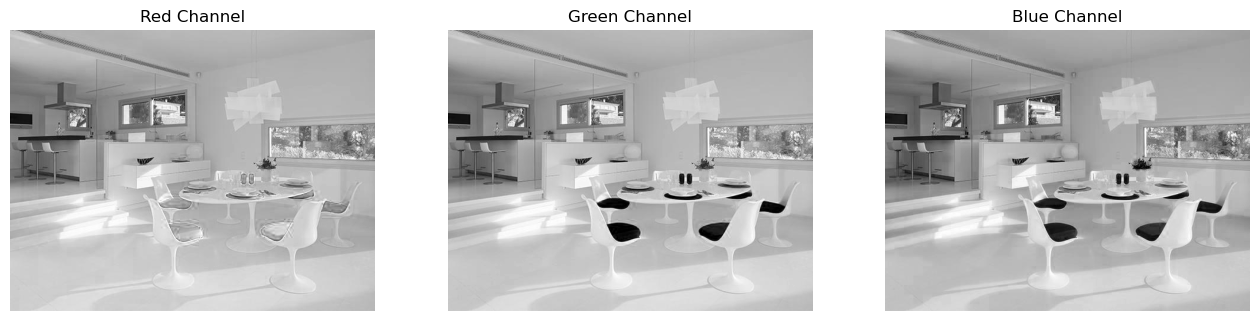

In [26]:
from PIL import Image

image = Image.open('/Users/raneem/Desktop/SDA PROJECTS/ironhack-/labs/lab-computer-vision/images/sillas.jpg')


r, g, b = image.split()
fig, axes = plt.subplots(1, 3 , figsize=(16,4))

axes[0].imshow(r, cmap = 'grey',)
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(g, cmap = 'grey')
axes[1].set_title('Green Channel')
axes[1].axis('off')   

axes[2].imshow(b, cmap = 'grey')
axes[2].set_title('Blue Channel')
axes[2].axis('off')  

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

In [22]:
from numpy import asarray

In [20]:
# Convert image array
image_array = asarray(image).copy()
image_array

array([[[196, 202, 192],
        [190, 196, 186],
        [175, 181, 171],
        ...,
        [170, 174, 159],
        [169, 173, 158],
        [169, 173, 158]],

       [[184, 190, 180],
        [193, 199, 189],
        [202, 208, 198],
        ...,
        [170, 174, 159],
        [169, 173, 158],
        [169, 173, 158]],

       [[204, 207, 198],
        [199, 202, 193],
        [193, 196, 187],
        ...,
        [170, 174, 159],
        [169, 173, 158],
        [169, 173, 158]],

       ...,

       [[204, 199, 193],
        [204, 199, 193],
        [204, 199, 193],
        ...,
        [181, 182, 176],
        [182, 183, 177],
        [182, 183, 177]],

       [[204, 199, 193],
        [204, 199, 193],
        [204, 199, 193],
        ...,
        [182, 183, 177],
        [181, 182, 176],
        [181, 182, 176]],

       [[205, 200, 194],
        [205, 200, 194],
        [205, 200, 194],
        ...,
        [187, 188, 182],
        [184, 185, 179],
        [184, 185, 179]]

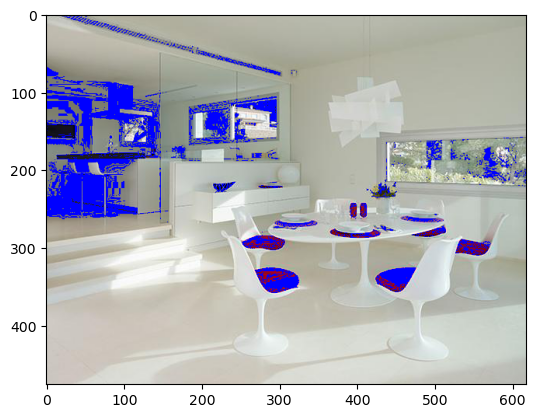

In [21]:
# Iterate through each pixel and get the dimensions of the array
height, width, channels = image_array.shape

for i in range(height):
    for j in range(width):
        # get the rgb values of current pixel
        r , g , b = image_array[i,j] 
       
        # check if the pixel is red
        if r>150 & g<100 & b<100:
            # if the condition is true then lets set the pixel to blue
            image_array[i,j]=[0,0,255]

# Convert the array back to image
blue_image = Image.fromarray(image_array)
plt.imshow(blue_image)

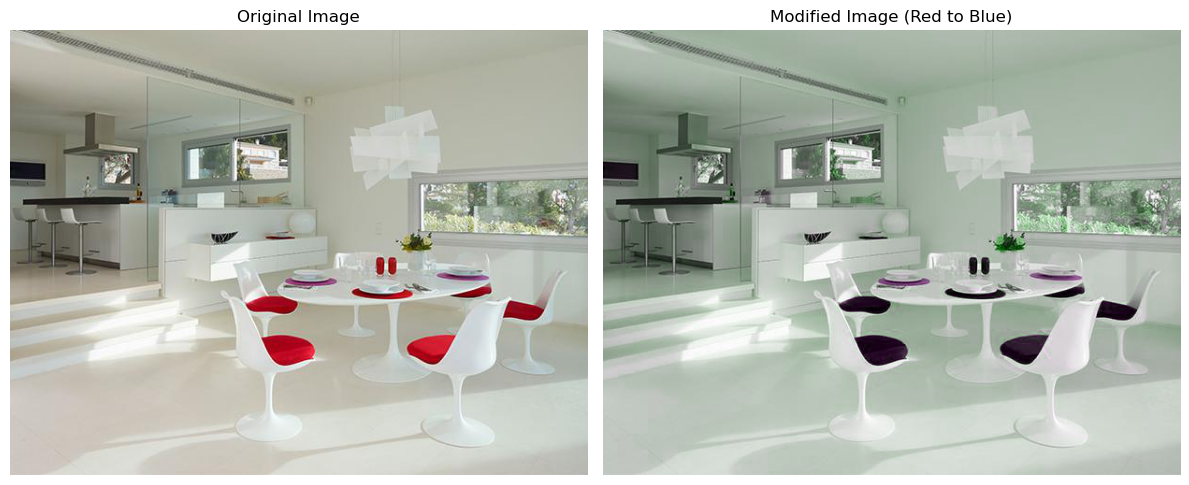

In [29]:
import numpy as np


# Convert to NumPy array
image = np.array(image)

# Extract the blue channel
blue_channel = image[:, :, 2]
copy_image = np.copy(image)
copy_image[:, :, 0] = blue_channel  # Replace red with blue

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(copy_image)
axes[1].set_title("Modified Image (Red to Blue)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

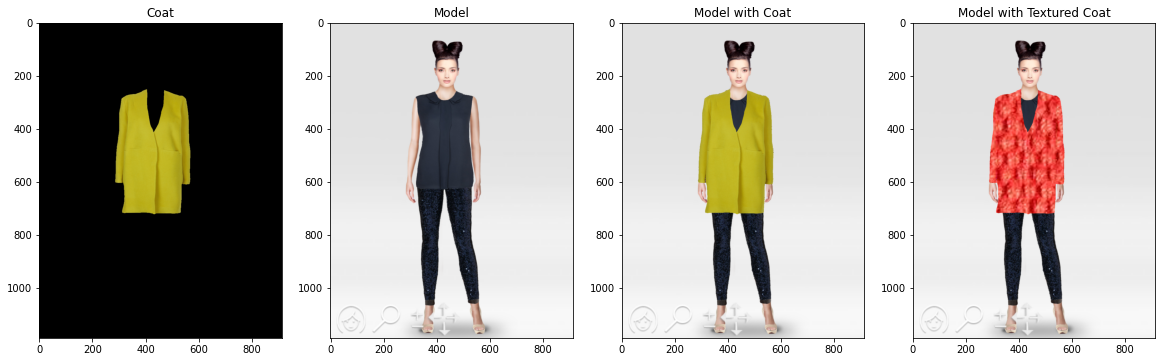

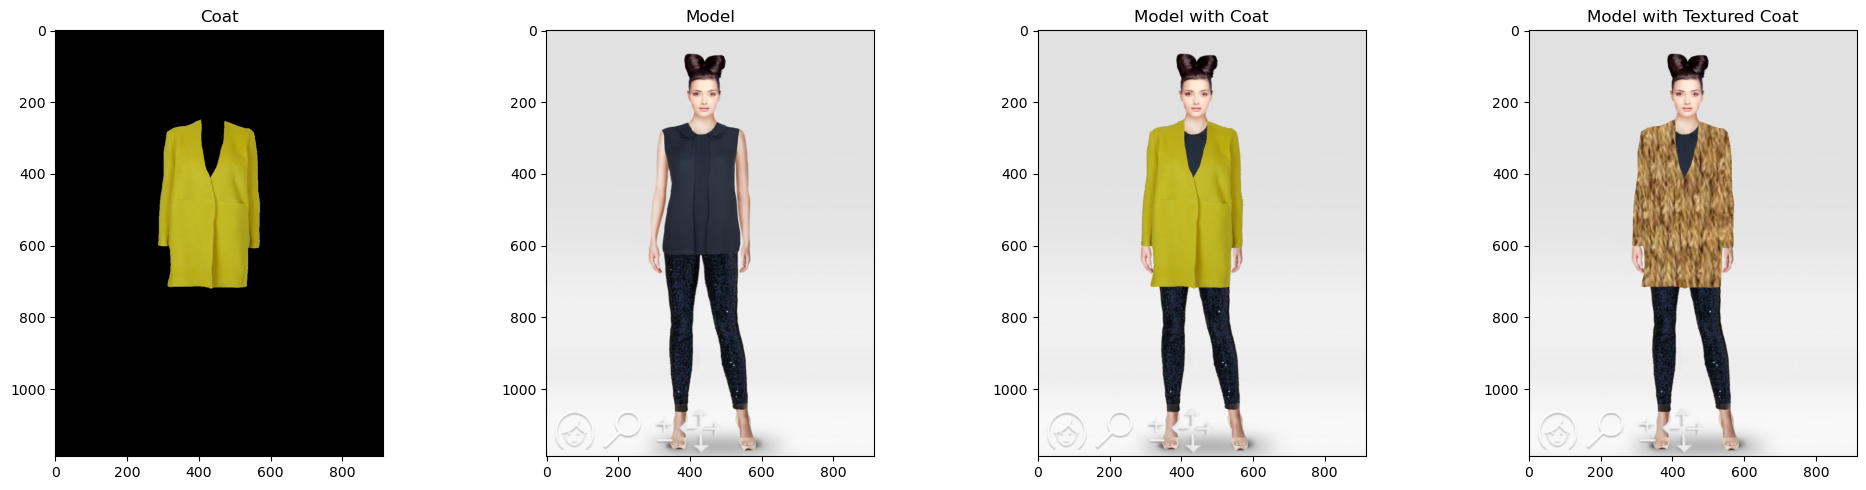

In [31]:
model_image = io.imread('images/model.png')
coat_image = io.imread('images/coat.png')
texture_image = io.imread('images/texture.png')

# Resize the coat and texture images to the same size as the model image
if model_image.shape[2] == 4:
    model_image = model_image[:, :, :3]  # Remove alpha channel if present
if coat_image.shape[2] == 4:
    coat_image = coat_image[:, :, :3]  # Remove alpha channel if present
if texture_image.shape[2] == 4:
    texture_image = texture_image[:, :, :3]  # Remove alpha channel if present

coat_resize = cv.resize(coat_image, (model_image.shape[1], model_image.shape[0]))
texture_resize = cv.resize(texture_image, (model_image.shape[1], model_image.shape[0]))

#Create mask for the coat using grayscale
gray_coat = cv.cvtColor(coat_resize, cv.COLOR_RGB2GRAY)
_, mask = cv.threshold(gray_coat, 1, 255, cv.THRESH_BINARY)
mask_3d = np.stack([mask] * 3, axis=-1)


model_with_coat = model_image.copy()
model_with_coat[mask_3d == 255] = coat_resize[mask_3d == 255]
coat_with_texture = coat_resize.copy()
coat_with_texture[mask == 255] = texture_resize[mask == 255]


model_with_textured_coat = model_image.copy()
model_with_textured_coat[mask_3d == 255] = coat_with_texture[mask_3d == 255]


figs, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(coat_image)
axes[0].set_title("Coat")
axes[0].axis('on')

axes[1].imshow(model_image)
axes[1].set_title("Model")
axes[1].axis('on')

axes[2].imshow(model_with_coat)
axes[2].set_title("Model with Coat")
axes[2].axis('on')

axes[3].imshow(model_with_textured_coat)
axes[3].set_title("Model with Textured Coat")
axes[3].axis('on')

plt.tight_layout()
plt.show()



# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




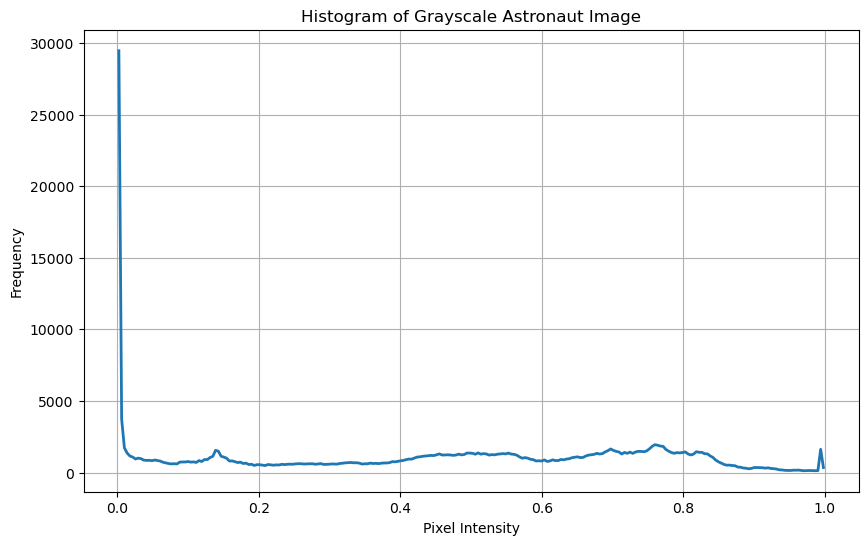

In [34]:
astronaut_image = data.astronaut()

#Grayscale
grayscale_astronaut = color.rgb2gray(astronaut_image)
hist, bin_centers = exposure.histogram(grayscale_astronaut)
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, lw=2)
plt.title('Histogram of Grayscale Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

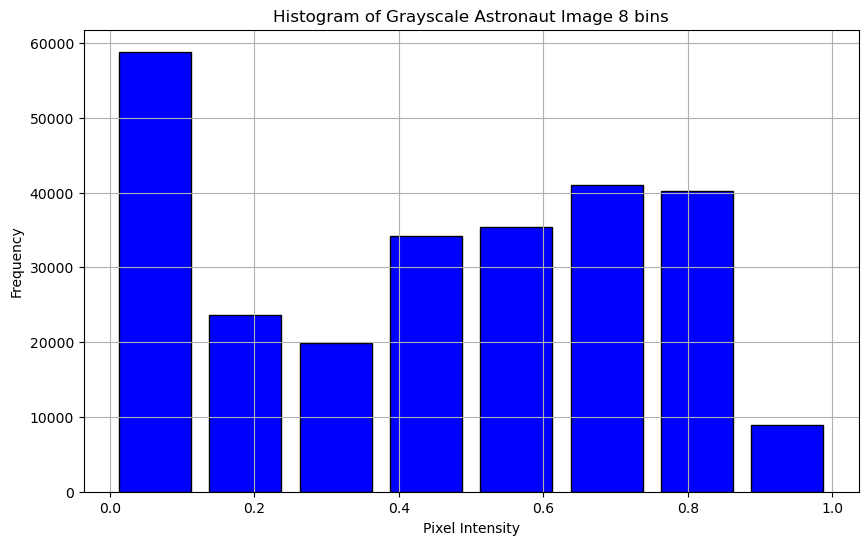

In [35]:
hist, bin_centers = exposure.histogram(grayscale_astronaut, nbins=8)
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, hist, width=0.1, color='blue', edgecolor='black')
plt.title('Histogram of Grayscale Astronaut Image 8 bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



Changing the bin count in a histogram affects how the data is grouped and visualized. A low bin count will group the data into fewer groups, while a high bin count will group the data into more groups.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


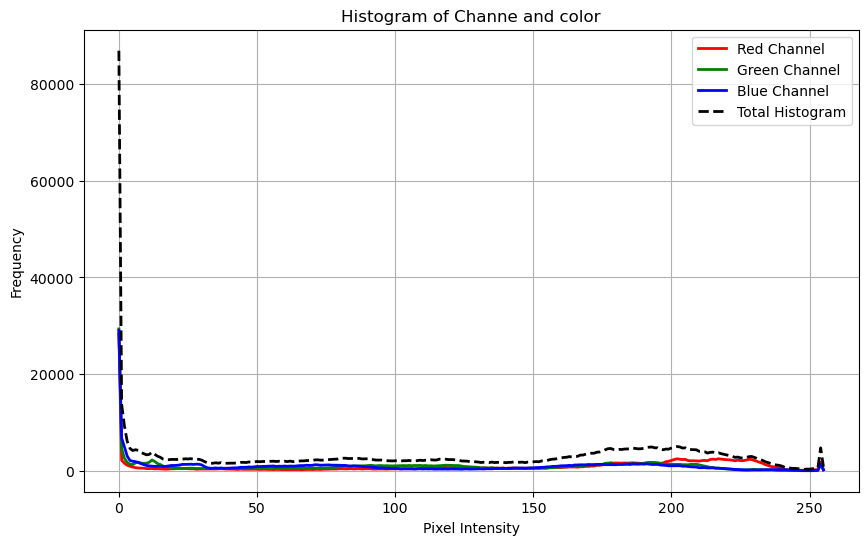

In [36]:
astronaut_image = data.astronaut()


red_channel = astronaut_image[:, :, 0]  # Red channel
green_channel = astronaut_image[:, :, 1]  # Green channel
blue_channel = astronaut_image[:, :, 2]  # Blue channel
hist_red, bin_centers_red = exposure.histogram(red_channel)
hist_green, bin_centers_green = exposure.histogram(green_channel)
hist_blue, bin_centers_blue = exposure.histogram(blue_channel)




plt.figure(figsize=(10, 6))
plt.plot(bin_centers_red, hist_red, color='red', label='Red Channel', lw=2)
plt.plot(bin_centers_green, hist_green, color='green', label='Green Channel', lw=2)
plt.plot(bin_centers_blue, hist_blue, color='blue', label='Blue Channel', lw=2)
total_hist = hist_red + hist_green + hist_blue
plt.plot(bin_centers_red, total_hist, color='black', label='Total Histogram', lw=2, linestyle='--')
plt.title('Histogram of Channe and color')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



/opt/anaconda3/lib/python3.12/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


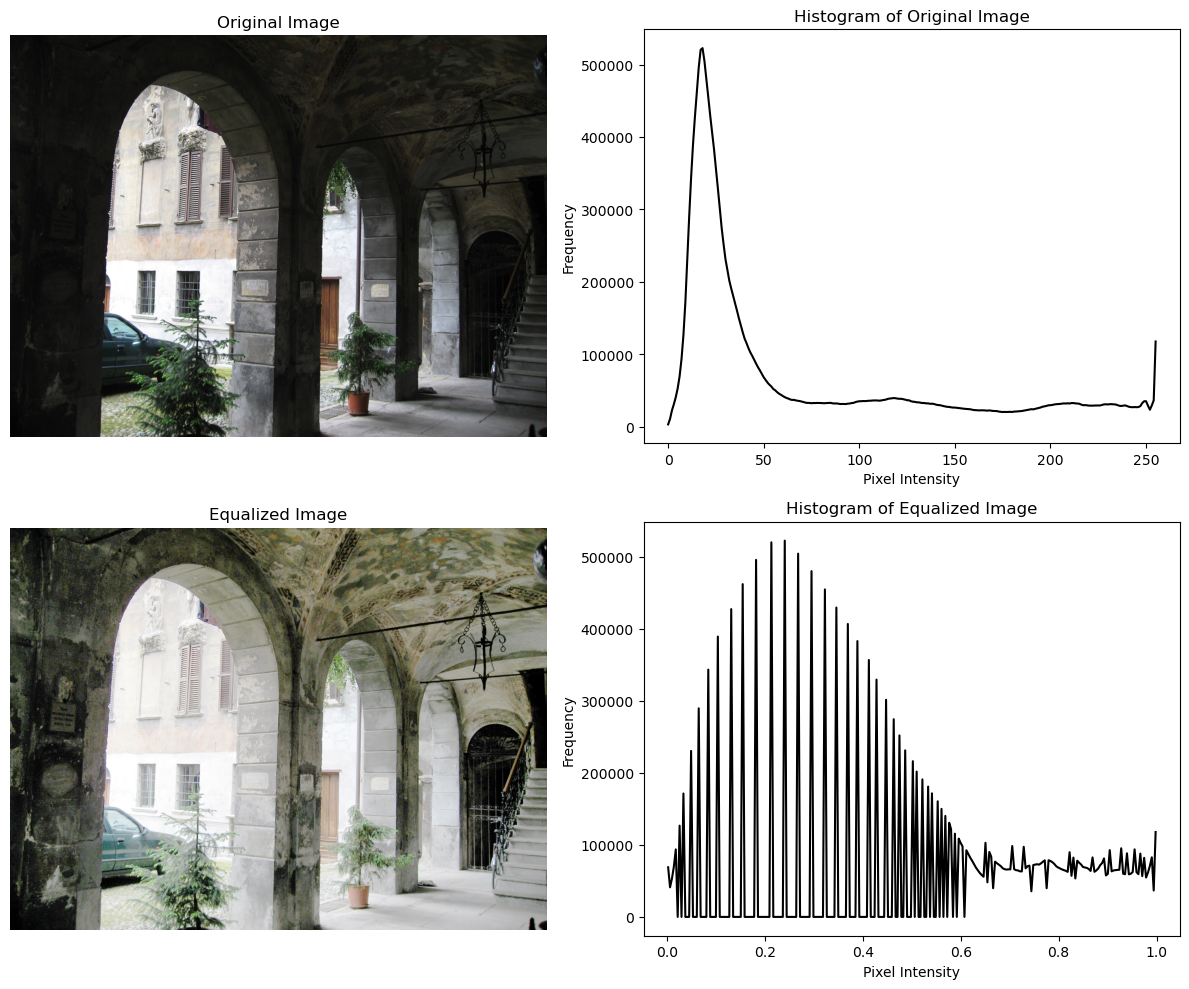

In [37]:
aquatermi_image = io.imread('images/aquatermi_lowcontrast.jpg')

#Compute the histogram of the original image
hist_original, bin_centers_original = exposure.histogram(aquatermi_image)

#Perform histogram equalization
equalized_image = exposure.equalize_hist(aquatermi_image)
hist_equalized, bin_centers_equalized = exposure.histogram(equalized_image)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


axes[0, 0].imshow(aquatermi_image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
axes[0, 1].plot(bin_centers_original, hist_original, color='black')
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title('Equalized Image')
axes[1, 0].axis('off')
axes[1, 1].plot(bin_centers_equalized, hist_equalized, color='black')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


Histogram equalization enhances contrast non-linearly by redistributing pixel intensities for a more uniform histogram, which may over-enhance certain areas. Linear contrast stretching, in contrast, applies a simple, predictable adjustment by mapping intensities between the minimum and maximum values for controlled enhancement.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



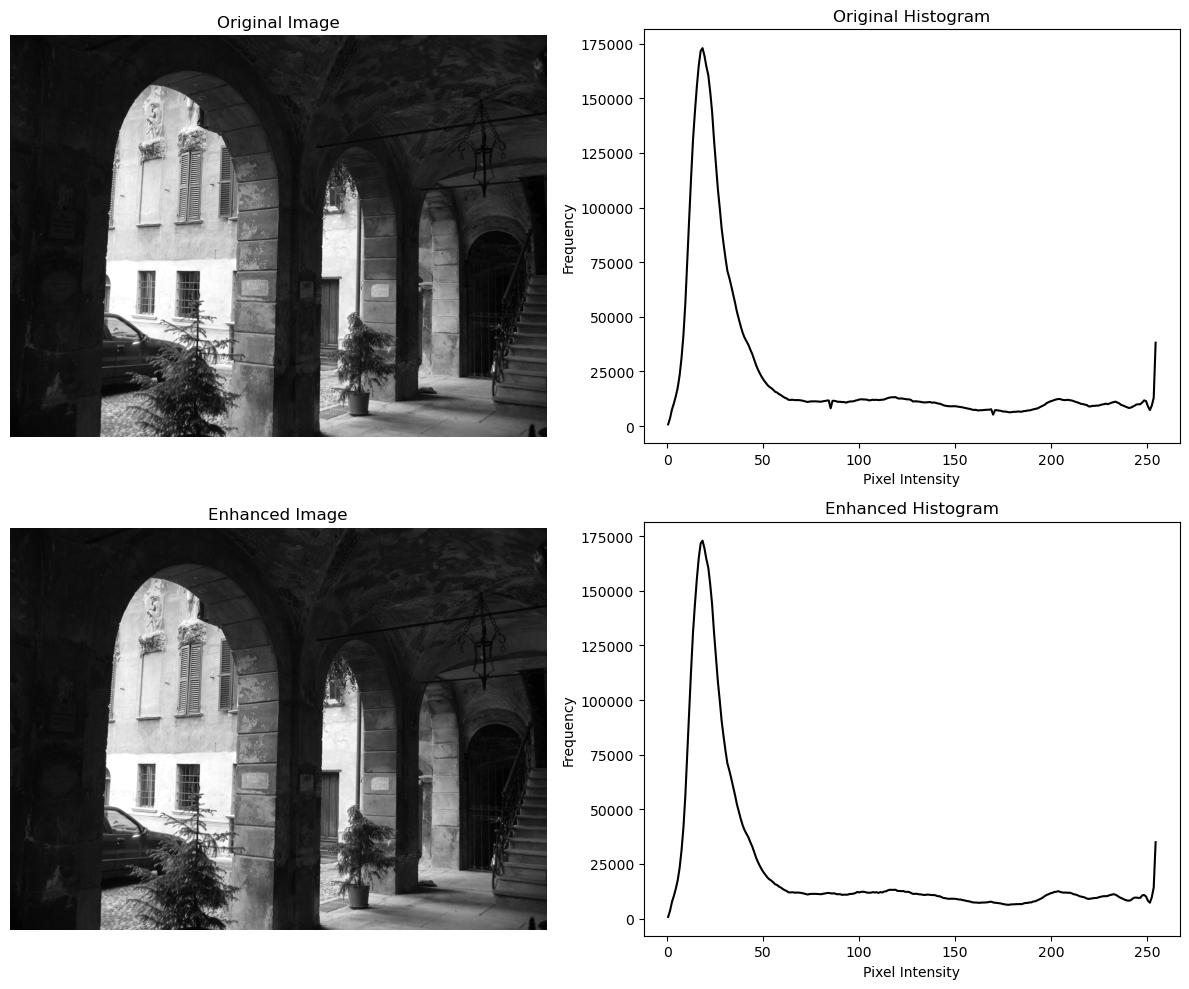

In [38]:
def linear_contrast_stretch(image, bin_count=256):
    #Find the minimum and maximum pixel values in the image
    I_min = np.min(image)
    I_max = np.max(image)
    
 
    enhanced_image = ((image - I_min) / (I_max - I_min) * 255).astype(np.uint8)
    return enhanced_image


image = io.imread('images/aquatermi_lowcontrast.jpg')
if image.ndim == 3:
    image = np.mean(image, axis=2)

#Perform linear contrast stretch
enhanced_image = linear_contrast_stretch(image)
hist_original, bin_centers = exposure.histogram(image, nbins=256)
hist_enhanced, _ = exposure.histogram(enhanced_image, nbins=256)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')
axes[0, 1].plot(bin_centers, hist_original, color='black')
axes[0, 1].set_title("Original Histogram")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title("Enhanced Image")
axes[1, 0].axis('off')
axes[1, 1].plot(bin_centers, hist_enhanced, color='black')
axes[1, 1].set_title("Enhanced Histogram")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




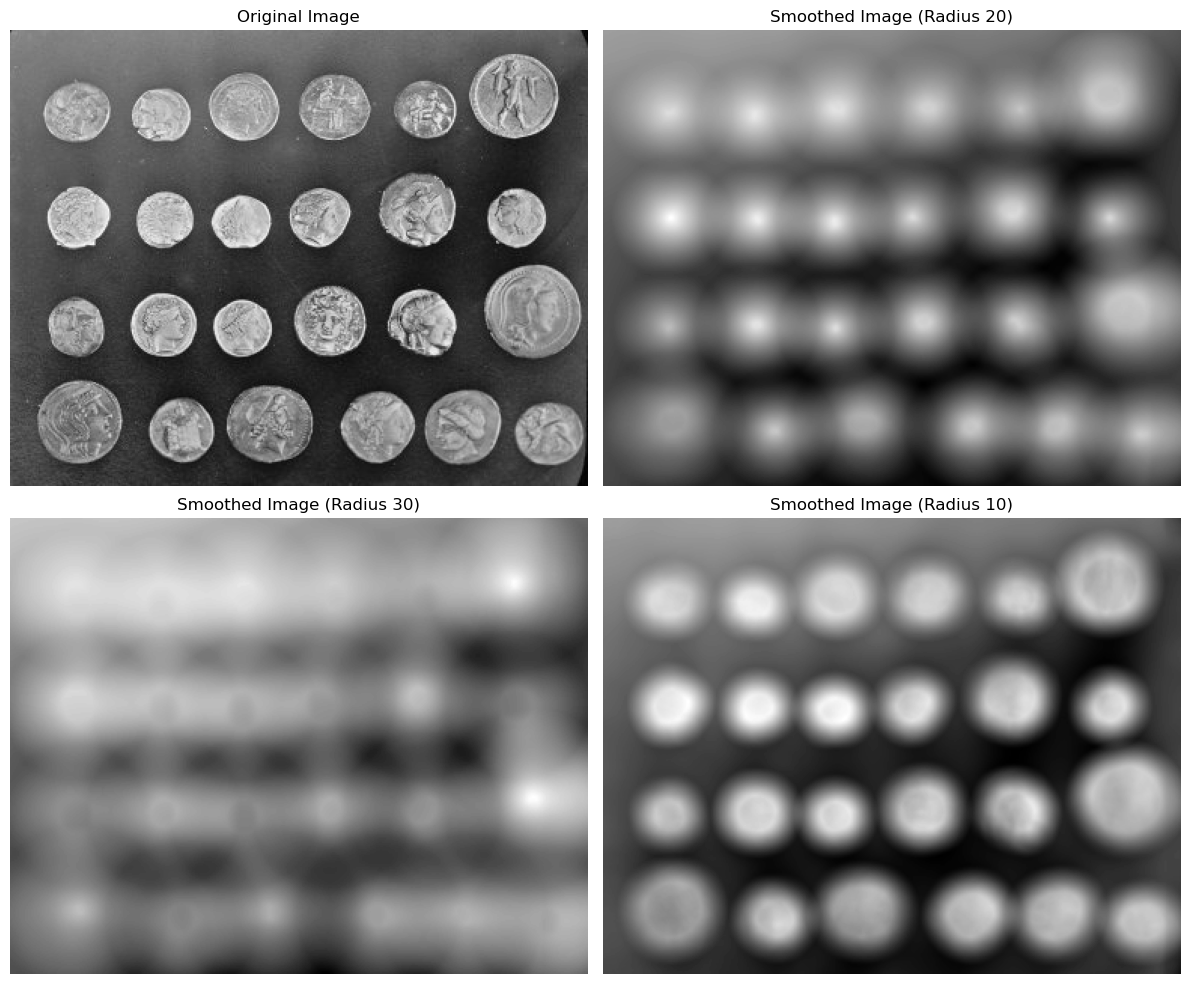

In [39]:
coins_image = data.coins()
selem_20 = morphology.disk(20)
smoothed_20 = filters.rank.mean(coins_image, selem_20)
selem_30 = morphology.disk(30)
smoothed_30 = filters.rank.mean(coins_image, selem_30)
selem_10 = morphology.disk(10)
smoothed_10 = filters.rank.mean(coins_image, selem_10)







#Plot images
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(coins_image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')
axes[0, 1].imshow(smoothed_20, cmap='gray')
axes[0, 1].set_title("Smoothed Image (Radius 20)")
axes[0, 1].axis('off')
axes[1, 0].imshow(smoothed_30, cmap='gray')
axes[1, 0].set_title("Smoothed Image (Radius 30)")
axes[1, 0].axis('off')
axes[1, 1].imshow(smoothed_10, cmap='gray')
axes[1, 1].set_title("Smoothed Image (Radius 10)")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

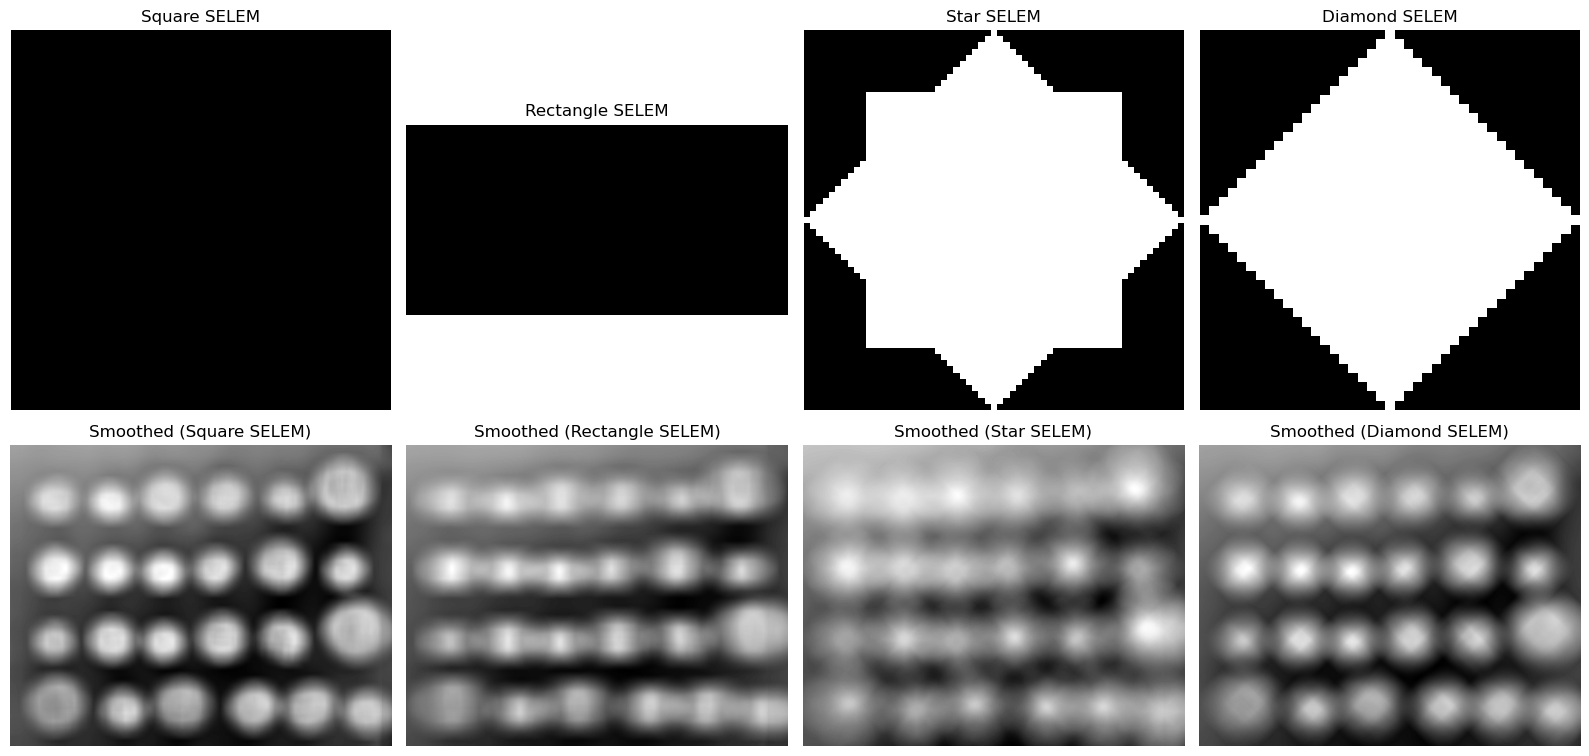

In [40]:
coins_image = data.coins()
selem_square = morphology.square(20)  
selem_rectangle = morphology.rectangle(20, 40)  
selem_star = morphology.star(20) 
selem_diamond = morphology.diamond(20) 

smoothed_square = filters.rank.mean(coins_image, selem_square)
smoothed_rectangle = filters.rank.mean(coins_image, selem_rectangle)
smoothed_star = filters.rank.mean(coins_image, selem_star)
smoothed_diamond = filters.rank.mean(coins_image, selem_diamond)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

#Display smoothed images
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title("Square SELEM")
axes[0, 0].axis('off')
axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title("Rectangle SELEM")
axes[0, 1].axis('off')
axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title("Star SELEM")
axes[0, 2].axis('off')
axes[0, 3].imshow(selem_diamond, cmap='gray')
axes[0, 3].set_title("Diamond SELEM")
axes[0, 3].axis('off')
axes[1, 0].imshow(smoothed_square, cmap='gray')
axes[1, 0].set_title("Smoothed (Square SELEM)")
axes[1, 0].axis('off')
axes[1, 1].imshow(smoothed_rectangle, cmap='gray')
axes[1, 1].set_title("Smoothed (Rectangle SELEM)")
axes[1, 1].axis('off')
axes[1, 2].imshow(smoothed_star, cmap='gray')
axes[1, 2].set_title("Smoothed (Star SELEM)")
axes[1, 2].axis('off')
axes[1, 3].imshow(smoothed_diamond, cmap='gray')
axes[1, 3].set_title("Smoothed (Diamond SELEM)")
axes[1, 3].axis('off')
plt.tight_layout()
plt.show()



*   How does changing the radius of disk affect the smoothing functionality?

A larger disk radius increases smoothing, making the image blurrier, while a smaller radius preserves more details with less smoothing.


*   What is the observed behaviour with difference in the structuring element?



The structuring element affects smoothing: Square gives uniform blur, Rectangle smooths more along its longer side, Star preserves edges better, and Diamond provides angular smoothing with less uniformity near edges.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



A mean filter applies uniform averaging, effective for salt-and-pepper noise but blurs edges. A Gaussian filter uses weighted averaging for smoother results, better preserving edges, making it ideal for reducing Gaussian noise in tasks like object detection and segmentation.